# Social Media Sentiment Analysis - Exploratory Data Analysis

Comprehensive analysis of the Sentiment140 dataset containing 1.6 million tweets.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


## 2. Load the Dataset

The Sentiment140 dataset contains 1.6 million tweets with the following columns:
- **target**: Sentiment (0 = negative, 2 = neutral, 4 = positive)
- **ids**: Tweet ID
- **date**: Tweet timestamp
- **flag**: Query flag (if there's a query)
- **user**: Username
- **text**: Tweet content

In [2]:
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

df = pd.read_csv('dataset/training.1600000.processed.noemoticon.csv', 
                 encoding='latin-1', 
                 names=column_names)

print(f'Dataset loaded successfully!')
print(f'Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')

Dataset loaded successfully!
Shape: 1,600,000 rows × 6 columns


## 3. Dataset Overview

In [3]:
print('First 10 rows of the dataset:')
df.head(10)

First 10 rows of the dataset:


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
print('Dataset Information:')
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
print('Statistical Summary:')
df.describe(include='all')

Statistical Summary:


,target,ids,date,flag,user,text
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000
unique,NaN,NaN,774363,1,659775,1581466
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1600000,549,210
mean,2.000000e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935761e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


## 4. Data Quality Check

In [6]:
print('Missing Values:')
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df)

Missing Values:
        Missing Count  Percentage
target              0         0.0
ids                 0         0.0
date                0         0.0
flag                0         0.0
user                0         0.0
text                0         0.0


In [7]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates:,}')

duplicate_texts = df['text'].duplicated().sum()
print(f'Duplicate tweets (same text): {duplicate_texts:,}')

Duplicate rows: 0
Duplicate tweets (same text): 18,534


## 5. Sentiment Distribution

In [8]:
print('Sentiment Distribution:')
sentiment_counts = df['target'].value_counts().sort_index()
print(sentiment_counts)
print(f'\nPercentage:')
print((sentiment_counts / len(df) * 100).round(2))

Sentiment Distribution:
target
0    800000
4    800000
Name: count, dtype: int64

Percentage:
target
0    50.0
4    50.0
Name: count, dtype: float64


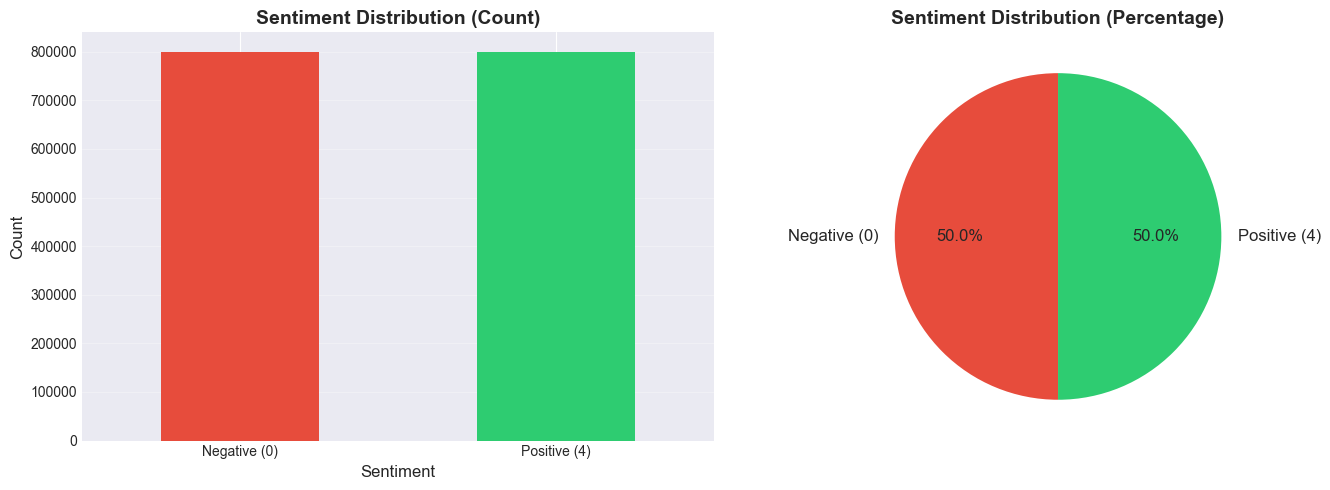

In [9]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sentiment_labels = {0: 'Negative (0)', 4: 'Positive (4)'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)
sentiment_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Sentiment Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#e74c3c', '#2ecc71']
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Text Analysis

In [10]:
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print('Tweet Length Statistics:')
print(f"Average character length: {df['text_length'].mean():.2f}")
print(f"Average word count: {df['word_count'].mean():.2f}")
print(f"Max character length: {df['text_length'].max()}")
print(f"Min character length: {df['text_length'].min()}")

Tweet Length Statistics:
Average character length: 74.09
Average word count: 13.18
Max character length: 374
Min character length: 6
Average word count: 13.18
Max character length: 374
Min character length: 6


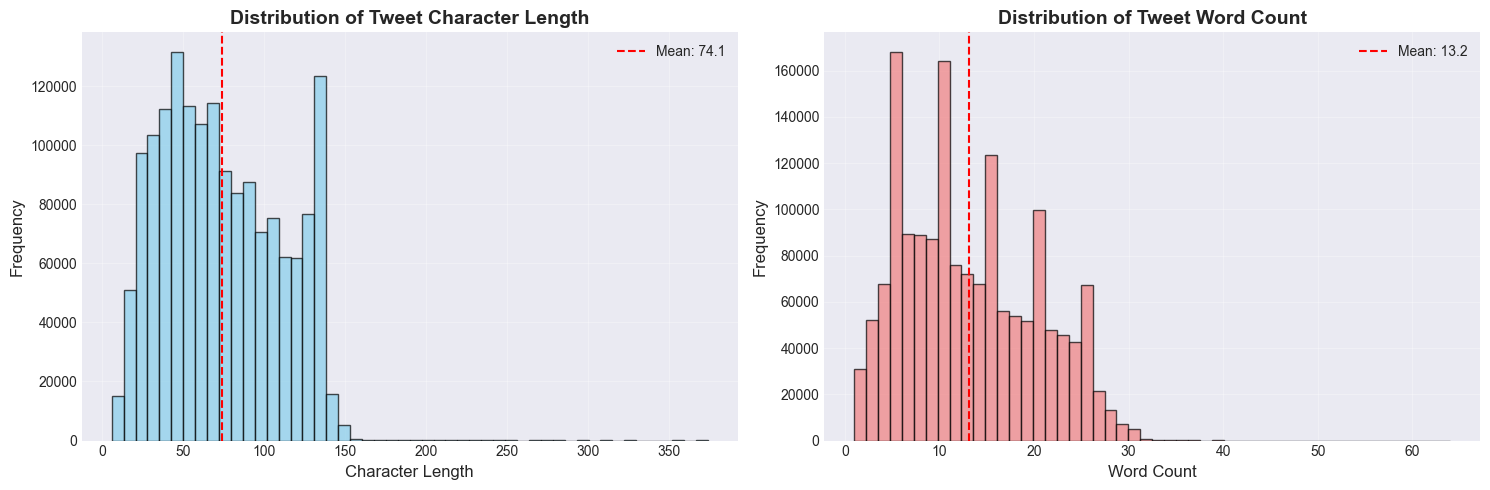

In [11]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Character length distribution
axes[0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Tweet Character Length', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.1f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count distribution
axes[1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Tweet Word Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.1f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Sample Tweets by Sentiment

In [12]:
print('Sample NEGATIVE Tweets:')
print('='*80)
for i, tweet in enumerate(df[df['target'] == 0]['text'].sample(5).values, 1):
    print(f"{i}. {tweet}")
    print()

Sample NEGATIVE Tweets:
1. Jo, i dont understand all this! 

2. @_sweetpea what's up? 

3. Tonight may have been the last baseball game I will ever see my nephew play.  

4. @Phatlip12 Sincere Condolences to you and your family. 

5. @VanessaFabian i wanna go next time! i wanna win d j-pot again! u still in pain? poor baby 



In [13]:
print('Sample POSITIVE Tweets:')
print('='*80)
for i, tweet in enumerate(df[df['target'] == 4]['text'].sample(5).values, 1):
    print(f"{i}. {tweet}")
    print()

Sample POSITIVE Tweets:
1. @niknice I totally feel you sis!  Boo hoo bye-bye 

2. @stefaniemosca what does make sense is how much I love you   http://myloc.me/2AqR

3. @chocolatesuze that's exactly what i was thinking! they're so cute and bright coloured 

4. @YoungQ glad you made it safe. and of course we have love for you! 

5. @AngelaKeen Sounds awesome!  My day is just beginning 



## 8. Time-based Analysis

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y', errors='coerce')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

print('Date Range:')
print(f"From: {df['date'].min()}")
print(f"To: {df['date'].max()}")

Date Range:
From: 2009-04-06 22:19:45
To: 2009-06-25 10:28:31


## 9. User Analysis

In [15]:
unique_users = df['user'].nunique()
print(f'Unique users: {unique_users:,}')

print('\nTop 10 Most Active Users:')
top_users = df['user'].value_counts().head(10)
print(top_users)

Unique users: 659,775

Top 10 Most Active Users:
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64


## 10. Summary of Dataset Structure

In [16]:
print('='*80)
print('DATASET STRUCTURE SUMMARY')
print('='*80)
print(f'\nTotal Tweets: {len(df):,}')
print(f'Unique Users: {df["user"].nunique():,}')
print(f'Date Range: {df["date"].min().date()} to {df["date"].max().date()}')
print(f'\nColumns: {list(df.columns)}')
print(f'\nSentiment Classes:')
print(f'  - Negative (0): {(df["target"] == 0).sum():,} tweets')
print(f'  - Positive (4): {(df["target"] == 4).sum():,} tweets')
print(f'\nText Statistics:')
print(f'  - Avg character length: {df["text_length"].mean():.2f}')
print(f'  - Avg word count: {df["word_count"].mean():.2f}')
print('\nDataset is ready for preprocessing and analysis!')
print('='*80)

DATASET STRUCTURE SUMMARY

Total Tweets: 1,600,000
Unique Users: 659,775
Date Range: 2009-04-06 to 2009-06-25

Columns: ['target', 'ids', 'date', 'flag', 'user', 'text', 'text_length', 'word_count', 'year', 'month', 'day', 'hour', 'day_of_week']

Sentiment Classes:
  - Negative (0): 800,000 tweets
  - Positive (4): 800,000 tweets

Text Statistics:
  - Avg character length: 74.09
  - Avg word count: 13.18

Dataset is ready for preprocessing and analysis!
Unique Users: 659,775
Date Range: 2009-04-06 to 2009-06-25

Columns: ['target', 'ids', 'date', 'flag', 'user', 'text', 'text_length', 'word_count', 'year', 'month', 'day', 'hour', 'day_of_week']

Sentiment Classes:
  - Negative (0): 800,000 tweets
  - Positive (4): 800,000 tweets

Text Statistics:
  - Avg character length: 74.09
  - Avg word count: 13.18

Dataset is ready for preprocessing and analysis!
